#Linear Regression Implementation 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
df=pd.read_csv('housing.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


checking for the presence of null values !

In [9]:
df.isnull().value_counts()

RM     LSTAT  PTRATIO  MEDV 
False  False  False    False    489
dtype: int64

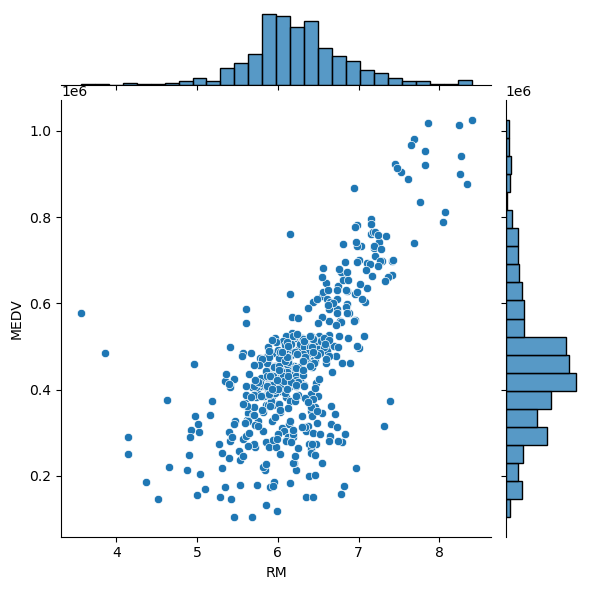

In [14]:
sns.jointplot(data=df,x='RM',y='MEDV')

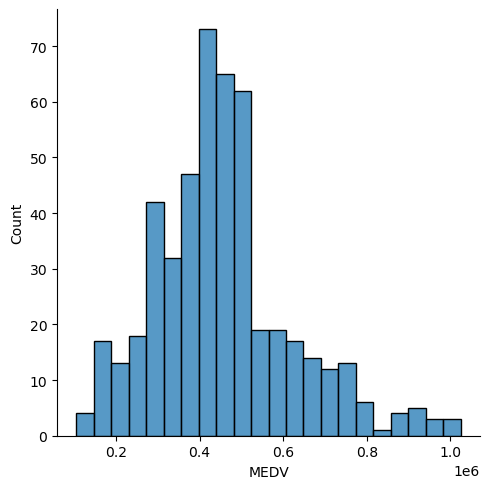

In [20]:
sns.displot(df['MEDV'])

Spliting X and Y variable to form the data 

In [23]:
X=df[['LSTAT','RM','PTRATIO']]
y=df['MEDV']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [25]:
model=LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=model.predict(X_test)

In [28]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [29]:
print("Model Performance:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared Score:", r2)

Model Performance:
Mean Absolute Error: 63872.12089158986
Mean Squared Error: 6811836639.810126
Root Mean Squared Error: 82533.8514781064
R-Squared Score: 0.7212345664576526


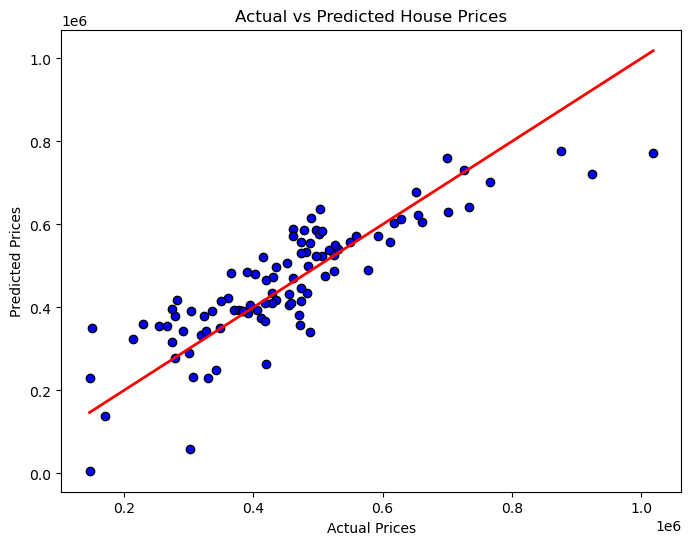

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)  # Reference line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()